In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [2]:
data = pd.read_csv("spam_ham_dataset.csv") 

In [3]:
data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


# Turning categorical values into numerical values

Spam is 1
Ham is 0

In [4]:
data['label'] = data['label'].apply(lambda x: 0 if x == "ham" else 1)

# Representation of input featurs and target variables.
X will be our feature, we have as 'text'
y is our target variable which is 'label_num', either 0 or 1 (ham, spam)

In [5]:
X, y = data['text'], data['label_num']

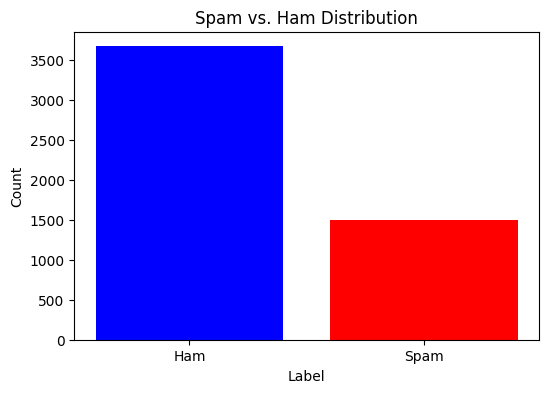

In [12]:
# Count the number of each label
label_counts = data["label"].value_counts()
label_counts.index = ["Ham", "Spam"]
# Plot
plt.figure(figsize=(6, 4))
plt.bar(label_counts.index, label_counts.values, color=["blue", "red"])
plt.xlabel("Label")

plt.ylabel("Count")
plt.title("Spam vs. Ham Distribution")
plt.xticks(rotation=0)
plt.show()

# We will split the data into testing and training data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Vectorizing the data

This will help us disginguish specifc words that identify the data as ham or spam. 


TfidfVectorizer(stop_words="english", max_df = 0.7) -> This will remove common english words (such as "and", "the", etc) in about 70% of the given texts.

vectorizer.fit_transform(X_train) -> learns the vocab from the testing data and organises it into a numerical matrix where the rows are texts and coloums are words (features). The values on this would be the TF-IDF scores, which is the importance of the word in a text.

vectorizer.transform(X_test) -> this uses the words learnt from X_train and then converts X_test into a numerical data using the same TF-IDF protocols.

In [ ]:
vectorizer = TfidfVectorizer(stop_words="english", max_df = 0.7)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
clf = LinearSVC()
clf.fit(X_train_vectorized, y_train)

LinearSVC()

In [16]:
clf.score(X_test_vectorized, y_test)

0.9942028985507246

In [17]:
len(y_test)

1035

# Out of 1035 entries, 99.4% where identified correctly

In [25]:
with open("mytext.txt", "w", encoding="utf-8") as f:
    f.write(X_test.iloc[10])

In [ ]:
with open("mytext.txt", "r", encoding="utf-8") as f:
    text = f.read()

In [27]:
vectorized_text = vectorizer.transform([text])

In [31]:
clf.predict(vectorized_text)

array([1])